In [134]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import numpy as np
from scipy.stats import gaussian_kde

In [4]:
# Importing Dataset
file_path = "AF3_FeatReduc.xlsx"
data = pd.read_excel(file_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sub           419 non-null    int64  
 1   Set           419 non-null    int64  
 2   meanAccX      419 non-null    float64
 3   meanAccY      419 non-null    float64
 4   meanGyrX      419 non-null    float64
 5   meanGyrY      419 non-null    float64
 6   meanGyrZ      419 non-null    float64
 7   meanMagX      419 non-null    float64
 8   meanMagZ      419 non-null    float64
 9   STDAccX       419 non-null    float64
 10  STDAccZ       419 non-null    float64
 11  STDGyrY       419 non-null    float64
 12  STDMagX       419 non-null    float64
 13  SkewAccX      419 non-null    float64
 14  SkewAccY      419 non-null    float64
 15  SkewAccZ      419 non-null    float64
 16  SkewGyrX      419 non-null    float64
 17  SkewGyrZ      419 non-null    float64
 18  SkewMagY      419 non-null    

In [135]:
# Selecting features
features = [col for col in data.columns if data[col].dtype in ['float64', 'int64'] and col not in ['Sub', 'Set', 'Type']]

# Standardizing the features
x = data[features].values
x = StandardScaler().fit_transform(x)

# Applying PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])

finalDf = pd.concat([principalDf, data[['Type']]], axis=1)

# Plotting the PCA 
fig = px.scatter(finalDf, x='Principal Component 1', y='Principal Component 2', color='Type',
                 title="PCA of Dataset Features")
fig.show()


PCA showed use that there is a clear division between the different outcome of the exercise, this can be good to simplify our training since it will create easier decision trees but there are higher probability to fall in overfitting and mostly, when the execution will be no longer simulated but real case scenario, if they fall "on the middle" the model will not be able to predict the correct label

# Correlation Matrix

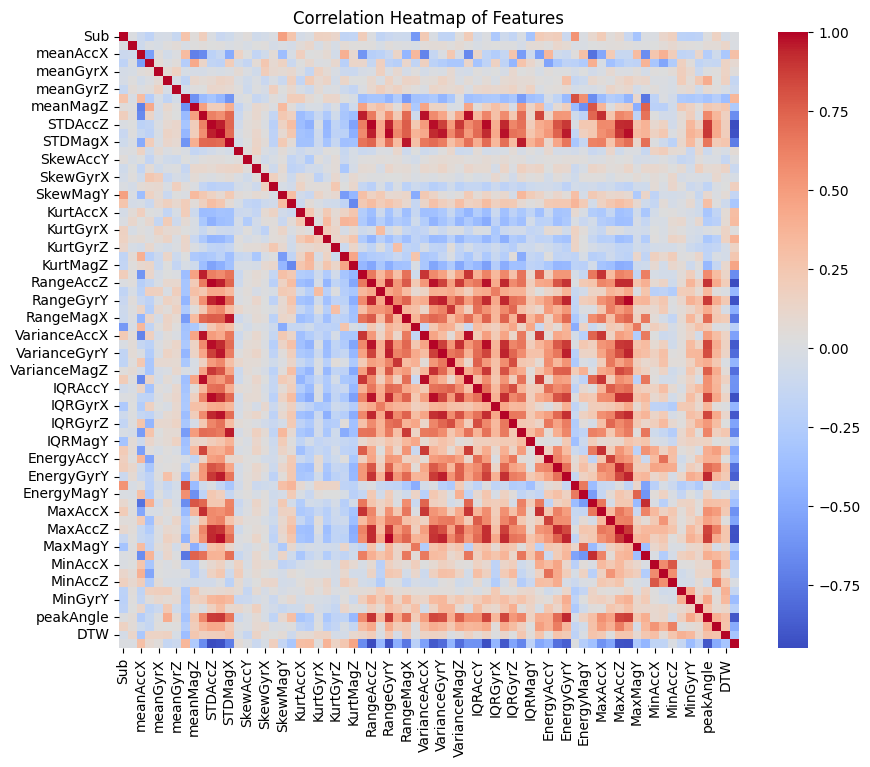

In [136]:
# Calculating correlation matrix
corr = data[[col for col in data.columns if data[col].dtype in ['float64', 'int64']]].corr()

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()


Nonetheless Feature Selection was alrea1dy performed, cutting down the original 96 variables to the current 67 using Lasso, there are still some highly correlated variables that may be deleted. I am worried about the hypotetical loss of information that could happen so for the moment we don't touch anything, if we manage to retrieve the original dataset we can make feature selection from scratch and correctly delete the highly correlated variables 

Here we visualize the value in a df to see the numbers, using seaborn we need a really big graph due to the high number of variables

In [137]:
numeric_features = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_features.corr()

corr_matrix

Sub       Set  meanAccX  meanAccY  meanGyrX  meanGyrY  \
Sub        1.000000  0.002932 -0.100300 -0.179570 -0.040215 -0.035067   
Set        0.002932  1.000000 -0.086216 -0.003369 -0.024867  0.028591   
meanAccX  -0.100300 -0.086216  1.000000 -0.555192  0.042626 -0.055303   
meanAccY  -0.179570 -0.003369 -0.555192  1.000000  0.065215  0.009499   
meanGyrX  -0.040215 -0.024867  0.042626  0.065215  1.000000  0.076741   
...             ...       ...       ...       ...       ...       ...   
MinGyrZ   -0.182397  0.022147  0.119567 -0.166737 -0.103719  0.237227   
peakAngle  0.015066  0.058476 -0.237366 -0.119910  0.011419  0.414806   
LDLJ       0.157279  0.056472 -0.075357 -0.142048  0.036896  0.020589   
DTW       -0.039857  0.131145 -0.290303  0.151353  0.150034  0.167857   
Type       0.002392 -0.002932  0.295546  0.087076  0.045067 -0.138854   

           meanGyrZ  meanMagX  meanMagZ   STDAccX  ...   MinAccX   MinAccY  \
Sub       -0.122752  0.276187  0.047764  0.191508  ...  0.001452  0.117553   
Set        0.059312 -0.019697  0.025203  0.040654  ...  0.023287  0.056537   
meanAccX   0.003889  0.322408 -0.708000 -0.665844  ...  0.258527  0.390037   
meanAccY   0.041403 -0.235145  0.433753  0.137267  ... -0.305157 -0.520925   
meanGyrX   0.159520 -0.024146 -0.034757 -0.036195  ...  0.035745  0.024875   
...             ...       ...       ...       ...  ...       ...       ...   
MinGyrZ   -0.072686 -0.261292  0.049503  0.000238  ...  0.102465  0.131438   
peakAngle  0.081688 -0.324361  0.241707  0.595121  ...  0.095575  0.128837   
LDLJ       0.034074 -0.240892  0.193719  0.359960  ...  0.528504  0.378386   
DTW       -0.024111 -0.370394  0.250237  0.174311  ...  0.302778  0.073857   
Type      -0.101182  0.355551 -0.267898 -0.647596  ... -0.166806 -0.167349   

            MinAccZ   MinGyrX   MinGyrY   MinGyrZ  peakAngle      LDLJ  \
Sub        0.175551 -0.195214 -0.198778 -0.182397   0.015066  0.157279   
Set        0.097823  0.045212  0.036403  0.022147   0.058476  0.056472   
meanAccX   0.198788 -0.167884 -0.142503  0.119567  -0.237366 -0.075357   
meanAccY  -0.255938  0.177152  0.042468 -0.166737  -0.119910 -0.142048   
meanGyrX   0.060977  0.190873  0.108272 -0.103719   0.011419  0.036896   
...             ...       ...       ...       ...        ...       ...   
MinGyrZ    0.069813  0.097205  0.176063  1.000000   0.269576  0.091858   
peakAngle -0.056981  0.185643  0.430597  0.269576   1.000000  0.396101   
LDLJ       0.621241  0.014533  0.057009  0.091858   0.396101  1.000000   
DTW        0.257517  0.387114  0.343058  0.129444   0.286793  0.269409   
Type      -0.002351 -0.129823 -0.375868 -0.211196  -0.900572 -0.479139   

                DTW      Type  
Sub       -0.039857  0.002392  
Set        0.131145 -0.002932  
meanAccX  -0.290303  0.295546  
meanAccY   0.151353  0.087076  
meanGyrX   0.150034  0.045067  
...             ...       ...  
MinGyrZ    0.129444 -0.211196  
peakAngle  0.286793 -0.900572  
LDLJ       0.269409 -0.479139  
DTW        1.000000 -0.315368  
Type      -0.315368  1.000000  

[70 rows x 70 columns]

We focus on really high correlated variables, due to their cube shape inside the corr matrix, we can assume that the info refers to variable of the same metric but regarding different axis, in some case the same info can be obtained in a 2D as in a 3D, but as told before, having the full dataset is necessary to have a better understanding of the data and how to deal with similar scenario

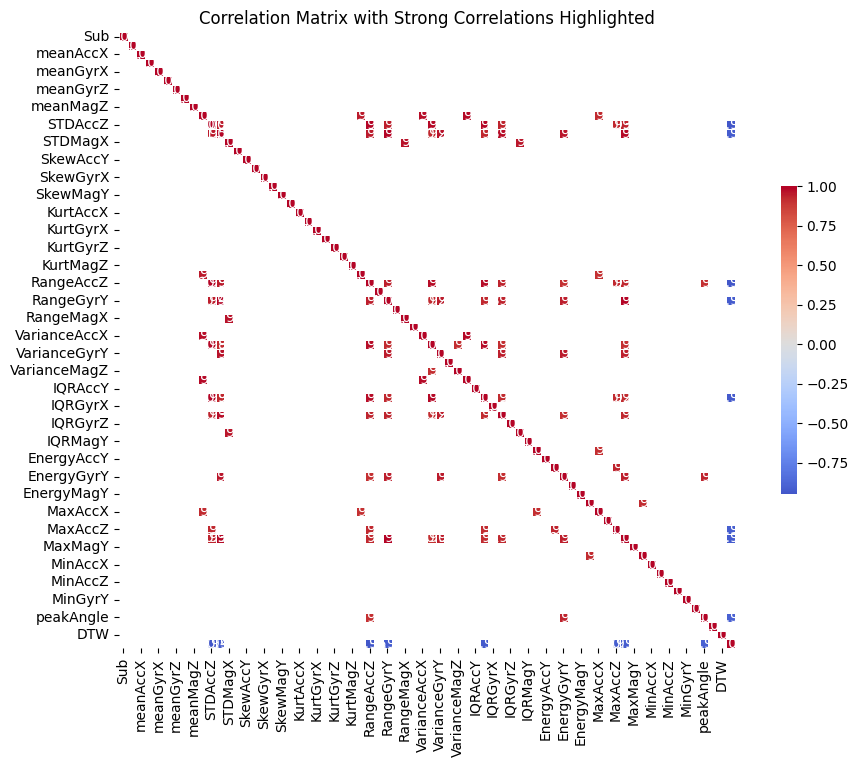

In [138]:
# filter for strong correlations
strong_corr_matrix = corr_matrix[(corr_matrix >= 0.9) | (corr_matrix <= -0.9)]

# Plot
plt.figure(figsize=(12, 8))

sns.heatmap(strong_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix with Strong Correlations Highlighted')
plt.show()


# Dinamic plotting of the variables

First of all, we group the variables by the metric used for calculation, putting all the different axis on the same plot.
Since Lasso was doing beforehand, we have case with 2 dimensions and case with 3 dimensions, to ensure cleaness in our code with split the two scenario

In [139]:
# function to retrieve the prefix
def common_prefix(col_name):
    return col_name[:-1]

prefixes = [prefix for prefix in set(common_prefix(col) for col in data.columns if col not in ['Sub', 'Set', 'Type']) 
            if sum(1 for col in data.columns if col.startswith(prefix)) > 1]


## 2D Plot Focusing on plotting the exercise outcome by exercise done
2D Plot (when we have only two axis instead of 3) Focusing on plotting the exercise outcome (yellow is correct, blu is not), the geometrical shape represent the type of exercise done

In [140]:
columns_needing_analysis = []
figures = []

shape_map = {
    1: 'circle',
    2: 'square',
    3: 'triangle-up'
}
for prefix in prefixes:
    columns = [col for col in data.columns if common_prefix(col) == prefix and col not in ['Sub', 'Set', 'Type']]
    
    if len(columns) == 2: 
        trace = go.Scatter(
            x=data[columns[0]],
            y=data[columns[1]],
            mode='markers',
            marker=dict(
                color=data['Type'],
                symbol=[shape_map[set_type] for set_type in data['Set']],  
                showscale=True
            ),
            name=prefix
        )
        layout = go.Layout(
            title=f"Scatter Plot for {prefix}",
            xaxis=dict(title=columns[0]), 
            yaxis=dict(title=columns[1])  
        )

        fig = go.Figure(data=[trace], layout=layout)
        figures.append(fig) 


    else:
        columns_needing_analysis.extend(columns) 

for fig in figures:
    fig.show()


## 3D Plot Focusing on plotting the exercise outcome by exercise done

In [145]:

columns_needing_analysis = []
figures = []

shape_map = {
    1: 'circle',
    2: 'square',
    3: 'diamond'
}
for prefix in prefixes:
    columns = [col for col in data.columns if common_prefix(col) == prefix and col not in ['Sub', 'Set', 'Type']]
    
    if len(columns) == 3: 
        trace = go.Scatter3d(
            x=data[columns[0]],
            y=data[columns[1]],
            z=data[columns[2]],
            mode='markers',
            marker=dict(
                color=data['Type'],
                symbol=[shape_map[set_type] for set_type in data['Set']],  
                showscale=True
            ),
            name=prefix
        )
        layout = go.Layout(
            title=f"Scatter Plot for {prefix}",
            scene=dict(
                xaxis=dict(title=columns[0]),
                yaxis=dict(title=columns[1]),
                zaxis=dict(title=columns[2])
            )
        )

        fig = go.Figure(data=[trace], layout=layout)
        figures.append(fig) 

for fig in figures:
    fig.show()


In [125]:
print("Columns needing further analysis:", columns_needing_analysis)

Columns needing further analysis: ['meanAccX_0', 'meanAccY_0', 'meanAccX_1', 'meanAccY_1', 'meanGyrX_0', 'meanGyrY_0', 'meanGyrZ_0', 'meanGyrX_1', 'meanGyrY_1', 'meanGyrZ_1', 'meanMagX_0', 'meanMagZ_0', 'meanMagX_1', 'meanMagZ_1', 'STDAccX_0', 'STDAccZ_0', 'STDAccX_1', 'STDAccZ_1', 'STDGyrY_0', 'STDGyrY_1', 'STDMagX_0', 'STDMagX_1', 'SkewAccX_0', 'SkewAccY_0', 'SkewAccZ_0', 'SkewAccX_1', 'SkewAccY_1', 'SkewAccZ_1', 'SkewGyrX_0', 'SkewGyrZ_0', 'SkewGyrX_1', 'SkewGyrZ_1', 'SkewMagY_0', 'SkewMagZ_0', 'SkewMagY_1', 'SkewMagZ_1', 'KurtAccX_0', 'KurtAccZ_0', 'KurtAccX_1', 'KurtAccZ_1', 'KurtGyrX_0', 'KurtGyrY_0', 'KurtGyrZ_0', 'KurtGyrX_1', 'KurtGyrY_1', 'KurtGyrZ_1', 'KurtMagX_0', 'KurtMagZ_0', 'KurtMagX_1', 'KurtMagZ_1', 'RangeAccX_0', 'RangeAccZ_0', 'RangeAccX_1', 'RangeAccZ_1', 'RangeGyrX_0', 'RangeGyrY_0', 'RangeGyrZ_0', 'RangeGyrX_1', 'RangeGyrY_1', 'RangeGyrZ_1', 'RangeMagX_0', 'RangeMagY_0', 'RangeMagX_1', 'RangeMagY_1', 'VarianceAccX_0', 'VarianceAccZ_0', 'VarianceAccX_1', 'Variance

Mostly the Lasso managed to reduce the dimensionality without losing a lot of information, we can see how for most of the variables analyzed we are able to cut the cartesian axis and separate the two labels efficiently

# 2D Plot Focusing on plotting the exercise done by exercise outcome
We inverted the focus here, the color represent the exercise done while the geometrical shape the outcome of the exercise

In [146]:
figures = []

shape_map = {
    0: 'circle',  
    1: 'triangle-up'  
}
color_map = {
    1: 'blue',  
    2: 'green',  
    3: 'red'  
}

for prefix in prefixes:
    columns = [col for col in data.columns if common_prefix(col) == prefix and col not in ['Sub', 'Set', 'Type']]
    
    if len(columns) == 2:  
        trace = go.Scatter(
            x=data[columns[0]],
            y=data[columns[1]],
            mode='markers',
            marker=dict(
                color=[color_map[set_type] for set_type in data['Set']],  
                symbol=[shape_map[type_val] for type_val in data['Type']],  
                showscale=False 
            ),
            name=prefix
        )
        layout = go.Layout(
            title=f"Scatter Plot for {prefix}",
            xaxis=dict(title=columns[0]), 
            yaxis=dict(title=columns[1])  
        )

        fig = go.Figure(data=[trace], layout=layout)
        figures.append(fig) 

for fig in figures:
    fig.show()



# 3D Plot Focusing on plotting the exercise done by exercise outcome


In [151]:
figures = []

shape_map = {
    0: 'circle',  
    1: 'square'  
}
color_map = {
    1: 'blue',  
    2: 'green',  
    3: 'red'  
}

for prefix in prefixes:
    columns = [col for col in data.columns if common_prefix(col) == prefix and col not in ['Sub', 'Set', 'Type']]
    
    if len(columns) == 3:  
        trace = go.Scatter3d(
            x=data[columns[0]],
            y=data[columns[1]],
            z=data[columns[2]],
            mode='markers',
            marker=dict(
                color=[color_map[set_type] for set_type in data['Set']],  
                symbol=[shape_map[type_val] for type_val in data['Type']],  
                showscale=False 
            ),
            name=prefix
        )
        layout = go.Layout(
            title=f"Scatter Plot for {prefix}",
            scene=dict(
                xaxis=dict(title=columns[0]), 
                yaxis=dict(title=columns[1]),
                zaxis=dict(title=columns[2])
            )
        )

        fig = go.Figure(data=[trace], layout=layout)
        figures.append(fig) 

for fig in figures:
    fig.show()


Focusing on the type of exercise done it's not possible to cluster the results based on a single exercise since they were simulated with the same proportion on exercise correctly done and not, in a real case scenario some exercise may be easier to do even for not gym user while others could be more related to bad execution due to their difficulty

# 2D Plot Focusing on plotting the exercise outcome by the player doing it

In [152]:
figures = []

# Define a mapping for different shapes based on the 'Sub' column
shape_map = {
    1: 'circle',
    2: 'square',
    3: 'triangle-up',
    4: 'diamond',
    5: 'cross',
    6: 'x',
    7: 'pentagon'
}

for prefix in prefixes:
    # Find all columns that start with the current prefix
    columns = [col for col in data.columns if common_prefix(col) == prefix and col not in ['Sub', 'Set', 'Type']]
    
    if len(columns) == 2:  # Only include if there are 2 columns
        # Create a 2D scatter plot
        trace = go.Scatter(
            x=data[columns[0]],
            y=data[columns[1]],
            mode='markers',
            marker=dict(
                color=data['Type'],
                symbol=[shape_map[sub] for sub in data['Sub']],  # Assign shapes based on 'Sub'
                showscale=True
            ),
            name=prefix
        )
        layout = go.Layout(
            title=f"Scatter Plot for {prefix}",
            xaxis=dict(title=columns[0]), 
            yaxis=dict(title=columns[1])  
        )

        fig = go.Figure(data=[trace], layout=layout)
        figures.append(fig) 

for fig in figures:
    fig.show()



# 3D Plot Focusing on plotting the exercise outcome by the player doing it

In [155]:
figures = []

# Define a mapping for different shapes based on the 'Sub' column
shape_map = {
    1: 'circle',
    2: 'square',
    3: 'square-open',
    4: 'diamond',
    5: 'cross',
    6: 'x',
    7: 'circle-open'
}

for prefix in prefixes:
    # Find all columns that start with the current prefix
    columns = [col for col in data.columns if common_prefix(col) == prefix and col not in ['Sub', 'Set', 'Type']]
    
    if len(columns) == 3:  # Only include if there are 2 columns
        # Create a 2D scatter plot
        trace = go.Scatter3d(
            x=data[columns[0]],
            y=data[columns[1]],
            z=data[columns[2]],
            mode='markers',
            marker=dict(
                color=data['Type'],
                symbol=[shape_map[sub] for sub in data['Sub']],  # Assign shapes based on 'Sub'
                showscale=True
            ),
            name=prefix
        )
        layout = go.Layout(
            title=f"Scatter Plot for {prefix}",
            scene=dict(
                xaxis=dict(title=columns[0]), 
                yaxis=dict(title=columns[1]),
                zaxis=dict(title=columns[2])
            )
        )

        fig = go.Figure(data=[trace], layout=layout)
        figures.append(fig) 

for fig in figures:
    fig.show()


With 7 players too many shapes are plotted and the graph may be hard to read, but we can see that further analysis is needed

# 2D Plot Focusing on plotting the player doing the exercise by exercise outcome

In [94]:
figures = []

shape_map = {
    0: 'circle',
    1: 'square'
}

player_colors = {
    1: 'blue',
    2: 'red',
    3: 'green',
    4: 'orange',
    5: 'purple',
    6: 'cyan',
    7: 'magenta'
}
figures = [] 
for prefix in prefixes:
    columns = [col for col in data.columns if common_prefix(col) == prefix and col not in ['Sub', 'Set', 'Type']]
    if len(columns) == 2: 

        trace = go.Scatter(
            x=data[columns[0]],
            y=data[columns[1]],
            mode='markers',
            marker=dict(
                color=data['Sub'].map(player_colors),  
                symbol=data['Type'].map(shape_map),  
                showscale=False
            ),
            name=prefix
        )
        layout = go.Layout(
            title=f"Scatter Plot for {prefix}",
            xaxis=dict(title=columns[0]), 
            yaxis=dict(title=columns[1])  
        )

        fig = go.Figure(data=[trace], layout=layout)
        figures.append(fig) 

for fig in figures:
    fig.show()

# 3D Plot Focusing on plotting the player doing the exercise by exercise outcome

In [157]:
figures = []

shape_map = {
    0: 'circle',
    1: 'square'
}

player_colors = {
    1: 'blue',
    2: 'red',
    3: 'green',
    4: 'orange',
    5: 'purple',
    6: 'cyan',
    7: 'magenta'
}
figures = [] 
for prefix in prefixes:
    columns = [col for col in data.columns if common_prefix(col) == prefix and col not in ['Sub', 'Set', 'Type']]
    if len(columns) == 3: 

        trace = go.Scatter3d(
            x=data[columns[0]],
            y=data[columns[1]],
            z=data[columns[2]],
            mode='markers',
            marker=dict(
                color=data['Sub'].map(player_colors),  
                symbol=data['Type'].map(shape_map),  
                showscale=False
            ),
            name=prefix
        )
        layout = go.Layout(
            title=f"Scatter Plot for {prefix}",
            scene=dict(
                xaxis=dict(title=columns[0]), 
                yaxis=dict(title=columns[1]),
                zaxis=dict(title=columns[2])
            ) 
        )

        fig = go.Figure(data=[trace], layout=layout)
        figures.append(fig) 

for fig in figures:
    fig.show()



In [ ]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from scipy.stats import gaussian_kde

data = merged_df.fillna(0)

def common_prefix(col_name):
    return col_name[:-3]

# Find unique prefixes to group by
prefixes = {}
for col in data.columns:
    prefix = common_prefix(col)
    if col not in ['Sub_0','Sub_1', 'Set_0','Set_1', 'Type_0', 'Type_1']:
        if prefix not in prefixes:
            prefixes[prefix] = []
        prefixes[prefix].append(col)
#print(prefixes)
# Create a figure with subplots for each prefix group
fig = go.Figure()

trace_index = {}  # Maps prefix to list of trace indices
index = 0  # Current index of trace in the figure

# Add scatter plots for each prefix
for prefix, columns in prefixes.items():
    trace_index[prefix] = []
    for col in columns:
        #print(col)
        # Here, you could customize the marker color based on the variable type
        var_type = col[-3:]  # Assume last char represents type
        #print(var_type)
        color_map = {'X_0': 'blue', 'Y_0': 'red', 'Z_0': 'green', 'X_1': 'deepskyblue', 'Y_1': 'pink', 'Z_1': 'lime'}
        marker_color = color_map.get(var_type, 'black')
        
        # Compute KDE
        kde = gaussian_kde(data[col])
        x_vals = np.linspace(data[col].min(), data[col].max(), 100)
        y_vals = kde(x_vals)
        
        # Add KDE curve
        fig.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines', name=f'{prefix}{var_type}', marker_color=marker_color, opacity=0.75))
        trace_index[prefix].append(index)
        index += 1

# Create dropdown menu for selecting different prefixes
buttons = []
total_traces = len(fig.data)  # Total number of traces in the figure

for prefix, indices in trace_index.items():
    visibility = [i in indices for i in range(total_traces)]
    button_label = prefix
    button_title = f'Distribution for Prefix: {prefix}'
    
    buttons.append(dict(
        method='restyle',
        label=button_label,
        args=[{'visible': visibility}, {'title': button_title}]
    ))

# Update layout with dropdown
fig.update_layout(
    updatemenus=[{
        'buttons': buttons,
        'direction': 'down',
        'showactive': True,
        'x': 0.1,
        'xanchor': 'left',
        'y': 1.15,
        'yanchor': 'top'
    }],
    title='Distribution of Variables by Prefix',
    xaxis_title='Value',
    yaxis_title='Probability Density'
)

fig.show()



The info regarding the which player is performing the exercise is really important, more than the exercise itself. We can see that for almost each prefix analyzed there are really clear cluster, two for each variable for plot separated by the outcome of the exercise (we have to remember that exercise were simulated so you either do it perfectly or you make really clear mistakes)

In [158]:
# To make the task easier, before hand we group the dataset by Type
df = data

df_0 = df[df['Type'] == 0]
df_1 = df[df['Type'] == 1]

df_0.columns = [col + '_0' for col in df_0.columns]
df_1.columns = [col + '_1' for col in df_1.columns]

merged_df = pd.concat([df_0, df_1], axis=1)
merged_df = merged_df.fillna(0)

merged_df



Sub_0  Set_0  meanAccX_0  meanAccY_0  meanGyrX_0  meanGyrY_0  meanGyrZ_0  \
0      1.0    1.0    0.004009   -0.003558   -1.598507    1.068402    0.149713   
1      1.0    1.0   -0.005194   -0.007942   -0.047902   -0.698478    0.277056   
2      1.0    1.0   -0.001506   -0.011843    0.068257    0.313657    0.067168   
3      1.0    1.0   -0.008709   -0.013882   -1.389528    2.312495   -0.038779   
4      1.0    1.0   -0.006690   -0.018155    0.114341   -0.781819    0.228530   
..     ...    ...         ...         ...         ...         ...         ...   
414    0.0    0.0    0.000000    0.000000    0.000000    0.000000    0.000000   
415    0.0    0.0    0.000000    0.000000    0.000000    0.000000    0.000000   
416    0.0    0.0    0.000000    0.000000    0.000000    0.000000    0.000000   
417    0.0    0.0    0.000000    0.000000    0.000000    0.000000    0.000000   
418    0.0    0.0    0.000000    0.000000    0.000000    0.000000    0.000000   

     meanMagX_0  meanMagZ_0  STDAccX_0  ...  MinAccX_1  MinAccY_1  MinAccZ_1  \
0     32.509599   -0.100533   0.012414  ...   0.000000   0.000000   0.000000   
1     32.860062   -1.239898   0.011458  ...   0.000000   0.000000   0.000000   
2     32.212699   -0.029970   0.010793  ...   0.000000   0.000000   0.000000   
3     32.078882    2.068351   0.016287  ...   0.000000   0.000000   0.000000   
4     31.998106    1.324981   0.014945  ...   0.000000   0.000000   0.000000   
..          ...         ...        ...  ...        ...        ...        ...   
414    0.000000    0.000000   0.000000  ...   0.000291   0.002218   0.036729   
415    0.000000    0.000000   0.000000  ...   0.000543   0.009129   0.040266   
416    0.000000    0.000000   0.000000  ...   0.000018   0.007730   0.042438   
417    0.000000    0.000000   0.000000  ...   0.000287   0.001242   0.045195   
418    0.000000    0.000000   0.000000  ...   0.000191   0.002082   0.050720   

     MinGyrX_1  MinGyrY_1  MinGyrZ_1  peakAngle_1    LDLJ_1     DTW_1  Type_1  
0     0.000000   0.000000   0.000000     0.000000  0.000000  0.000000     0.0  
1     0.000000   0.000000   0.000000     0.000000  0.000000  0.000000     0.0  
2     0.000000   0.000000   0.000000     0.000000  0.000000  0.000000     0.0  
3     0.000000   0.000000   0.000000     0.000000  0.000000  0.000000     0.0  
4     0.000000   0.000000   0.000000     0.000000  0.000000  0.000000     0.0  
..         ...        ...        ...          ...       ...       ...     ...  
414   0.006188   0.071786   0.015634     1.072702 -3.350909  0.697147     1.0  
415   0.006188   0.005768   0.001424     0.855458 -3.432737  0.563502     1.0  
416   0.011578   0.000525   0.006346     0.965669 -3.476538  0.441251     1.0  
417   0.002682   0.001647   0.000316     1.247830 -3.448182  0.719987     1.0  
418   0.006268   0.024902   0.001850     1.210370 -3.006417  0.669381     1.0  

[419 rows x 140 columns]

In [159]:
data = merged_df.fillna(0)

def common_prefix(col_name):
    return col_name[:-3]

prefixes = {}
for col in data.columns:
    prefix = common_prefix(col)
    if col not in ['Sub_0','Sub_1', 'Set_0','Set_1', 'Type_0', 'Type_1']:
        if prefix not in prefixes:
            prefixes[prefix] = []
        prefixes[prefix].append(col)
#print(prefixes)
fig = go.Figure()

trace_index = {}  
index = 0 

# Add scatter plots for each prefix
for prefix, columns in prefixes.items():
    trace_index[prefix] = []
    for col in columns:
        #print(col)

        var_type = col[-3:]  
        #print(var_type)
        color_map = {'X_0': 'blue', 'Y_0': 'red', 'Z_0': 'green', 'X_1': 'deepskyblue', 'Y_1': 'pink', 'Z_1': 'lime'}
        marker_color = color_map.get(var_type, 'black')
        
        # Compute KDE
        kde = gaussian_kde(data[col])
        x_vals = np.linspace(data[col].min(), data[col].max(), 100)
        y_vals = kde(x_vals)
        
        # Add KDE curve
        fig.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines', name=f'{prefix}{var_type}', marker_color=marker_color, opacity=0.75))
        trace_index[prefix].append(index)
        index += 1

# Create dropdown menu for selecting different prefixes
buttons = []
total_traces = len(fig.data)  

for prefix, indices in trace_index.items():
    visibility = [i in indices for i in range(total_traces)]
    button_label = prefix
    button_title = f'Distribution for Prefix: {prefix}'
    
    buttons.append(dict(
        method='restyle',
        label=button_label,
        args=[{'visible': visibility}, {'title': button_title}]
    ))

# Update layout with dropdown
fig.update_layout(
    updatemenus=[{
        'buttons': buttons,
        'direction': 'down',
        'showactive': True,
        'x': 0.1,
        'xanchor': 'left',
        'y': 1.15,
        'yanchor': 'top'
    }],
    title='Distribution of Variables by Prefix',
    xaxis_title='Value',
    yaxis_title='Probability Density'
)

fig.show()

